<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#prepare" data-toc-modified-id="prepare-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>prepare</a></span><ul class="toc-item"><li><span><a href="#model" data-toc-modified-id="model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>model</a></span></li><li><span><a href="#benchmark-file" data-toc-modified-id="benchmark-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>benchmark file</a></span></li></ul></li><li><span><a href="#appraisal---Full-Dataset" data-toc-modified-id="appraisal---Full-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>appraisal - Full Dataset</a></span><ul class="toc-item"><li><span><a href="#calculate-AP" data-toc-modified-id="calculate-AP-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>calculate AP</a></span></li><li><span><a href="#plot-PR---curve" data-toc-modified-id="plot-PR---curve-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot PR - curve</a></span></li><li><span><a href="#calc-ROC-AUC" data-toc-modified-id="calc-ROC-AUC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>calc ROC-AUC</a></span></li><li><span><a href="#plot-ROC" data-toc-modified-id="plot-ROC-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot ROC</a></span></li></ul></li><li><span><a href="#appraisal---reduced-dataset" data-toc-modified-id="appraisal---reduced-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>appraisal - reduced dataset</a></span><ul class="toc-item"><li><span><a href="#calculate-AP" data-toc-modified-id="calculate-AP-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>calculate AP</a></span></li><li><span><a href="#plot-PR---curve" data-toc-modified-id="plot-PR---curve-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>plot PR - curve</a></span></li><li><span><a href="#calc-ROC-AUC" data-toc-modified-id="calc-ROC-AUC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>calc ROC-AUC</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import pdb
from argparse import ArgumentParser
import shlex
from tqdm import tqdm

from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint

from pMHC import OUTPUT_FOLDER, SEP, \
    SPLITS, SPLIT_TRAIN, SPLIT_VAL, SPLIT_TEST, \
    VIEWS, VIEW_SA, VIEW_SAMA, VIEW_DECONV, \
    INPUT_PEPTIDE, INPUT_CONTEXT, \
    BENCHMARK_SA, BENCHMARK_MA
from pMHC.logic import PresentationPredictor
from pMHC.data import from_data, to_input
from pMHC.data.example import Sample, Peptide, Observation

tqdm.pandas()

In [2]:
import torch

from pytorch_lightning.utilities.seed import seed_everything

import pMHC
from pMHC import POSITIVE_THRESHOLD
from pMHC.logic.utils import load_latest, list_versions
from pMHC.data.utils import get_input_rep_PSEUDO, get_input_rep_FULL, convert_examples_to_batch
from pMHC.data.mhc_allele import MhcAllele
from pMHC.data.protein import Protein

In [3]:
from pMHC.data.utils import move_dict_to_device

In [4]:
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [6]:
from pMHC.data import from_input

In [7]:
pMHC.set_paths(r"/home/tux/Documents/MScProject")

Update project folder to: /home/tux/Documents/MScProject
Load permutation


# prepare

## model

In [8]:
version = "CONTEXT-PSEUDO-HEAD_Cls-DECOY_19-LR_0.00001"
checkpoint = "epoch=4-step=3648186"

In [9]:
MODEL_PATH = f"{pMHC.OUTPUT_FOLDER}{SEP}main{SEP}{version}{SEP}checkpoints{SEP}{checkpoint}.ckpt"
model = PresentationPredictor.load_from_checkpoint(MODEL_PATH, num_workers=0, 
                                                   name="mod", version="vers", shuffle_data=False,
                                                   output_attentions=True,
                                                   only_deconvolute=True
                                                  ) # can 
                                                    # soon be removed
    
model.setup()

Global seed set to 42
Global seed set to 42


PresentationPredictor.setup: 2021-08-17 20:16:30
MhcAllele.from_input


MhcAlleles from input: 11074it [00:00, 18585.93it/s]


Protein.from_input


Proteins from input: 185930it [00:09, 20270.75it/s]


Sample.from_input


Samples from input: 472it [00:00, 19356.94it/s]


Peptide.from_input


Peptides from input: 429339it [00:22, 19407.34it/s]


Observation.from_input


Observations from input: 1959736it [01:41, 19310.17it/s]
100%|██████████| 1959736/1959736 [00:06<00:00, 303731.26it/s]


Decoy.to_input
Load decoys for 1959737 observations
decoys_1200000_1250000.csv
decoys_650000_700000.csv
decoys_1650000_1700000.csv
decoys_1000000_1050000.csv
decoys_1950000_2000000.csv
decoys_1150000_1200000.csv
decoys_1800000_1850000.csv
decoys_1450000_1500000.csv
decoys_950000_1000000.csv
decoys_850000_900000.csv
decoys_50000_100000.csv
decoys_1050000_1100000.csv
decoys_1300000_1350000.csv
decoys_1900000_1950000.csv
decoys_900000_950000.csv
decoys_700000_750000.csv
decoys_450000_500000.csv
decoys_200000_250000.csv
decoys_800000_850000.csv
decoys_500000_550000.csv
decoys_1750000_1800000.csv
decoys_1550000_1600000.csv
decoys_1600000_1650000.csv
decoys_300000_350000.csv
decoys_1850000_1900000.csv
decoys_1350000_1400000.csv
decoys_1500000_1550000.csv
decoys_1250000_1300000.csv
decoys_550000_600000.csv
decoys_1100000_1150000.csv
decoys_0_50000.csv
decoys_750000_800000.csv
decoys_350000_400000.csv
decoys_400000_450000.csv
decoys_1700000_1750000.csv
decoys_1400000_1450000.csv
decoys_100000_

Global seed set to 42


PresentationPredictor.setup finished: 2021-08-17 20:24:24


Datasources

OBSERVATIONS                        /   MHC/Obs comb
   Edi                 :  1,550,250 /      7,209,446
   Atlas               :    409,486 /      2,436,897
   TOTAL               :  1,959,736 /      9,646,343




Splits

OBSERVATIONS                          SA            SAMA          Deconv
   train               :          205,591       1,407,876       6,734,816
   val                 :           33,920         274,378       1,299,848
   test                :           53,823         277,482       1,318,345
   val-prot            :           10,149          70,072         335,832
   test-prot           :           11,056          71,150         336,955
   val-mhc             :           23,771         204,306         964,016
   test-mhc            :           42,767         206,332         981,390



Dataloaders

EXAMPLES

   train               
      SA               :  4,111,820 /        128,494
      SAM

## benchmark file

In [10]:
benchmark_data_ma = pd.read_csv(pMHC.BENCHMARK_MA).fillna("")

In [11]:
benchmark_data_ma.head(2)

,protein_accession,peptide,sample_id,sample_group,n_flank,c_flank,hit,hla,netmhcpan4.ba,netmhcpan4.ba_best_allele,netmhcpan4.el,netmhcpan4.el_best_allele,mixmhcpred,mixmhcpred_best_allele,mhcflurry2.ba,mhcflurry2.ba_best_allele,mhcflurry2.ap.without_flanks,mhcflurry2.ap.with_flanks,mhcflurry2.ps.without_flanks,mhcflurry2.ps.with_flanks
0,J3KTA1,QLEDEALKY,10-002-S1-TISSUE,MULTIALLELIC-RECENT,RGCGGLKALFLKGCT,IGAHCPELVTLNLQT,1,HLA-A*02:01 HLA-A*31:01 HLA-B*13:02 HLA-B*58:0...,24848.000000,HLA-C*07:01,0.059723,HLA-B*58:01,-0.005424,HLA-B*58:01,3356.486844,HLA-C*07:01,0.145252,0.144131,0.045293,0.039817
1,A0A1X7SBR3,ALAAELNQL,10-002-S1-TISSUE,MULTIALLELIC-RECENT,ASYIEKVRFLEQQNK,RAKEPTKLADVYQAE,1,HLA-A*02:01 HLA-A*31:01 HLA-B*13:02 HLA-B*58:0...,31.703125,HLA-A*02:01,0.885742,HLA-A*02:01,0.552246,HLA-A*02:01,34.467987,HLA-A*02:01,0.658222,0.638135,0.961364,0.959060


In [12]:
n_flanks_, peptides_, c_flanks_, hits_, hlas_, preds_netmhcpan_, preds_mhcflurry_, preds_mixmhc_, preds_immunobert_ = \
    [], [], [], [], [], [], [], [], []

for idx, row in tqdm(benchmark_data_ma.iterrows()):
    _, peptide, _, _, n_flank, c_flank, hit, hla, \
        _, _, pred_netmhcpan, _, \
        pred_mixmhc, _, \
        _, _, _, _, _, pred_mhcflurry = row

    n_flanks_.append(n_flank)
    peptides_.append(peptide)
    c_flanks_.append(c_flank)
    hits_.append(hit)
    hlas_.append(hla)
    preds_netmhcpan_.append(pred_netmhcpan)
    preds_mhcflurry_.append(pred_mhcflurry)
    preds_mixmhc_.append(pred_mixmhc)
    preds_immunobert_.append(None)

del benchmark_data_ma

seed_everything(model.seed)
perm = np.random.permutation(range(len(peptides_)))

n_flanks = np.array(n_flanks_)[perm]
peptides = np.array(peptides_)[perm]
c_flanks = np.array(c_flanks_)[perm]
hits = np.array(hits_)[perm]
hlas = np.array(hlas_)[perm]
preds_netmhcpan = np.array(preds_netmhcpan_)[perm]
preds_mhcflurry = np.array(preds_mhcflurry_)[perm]
preds_mixmhc = np.array(preds_mixmhc_)[perm]
preds_immunobert = np.zeros(len(hits))

9158100it [07:26, 20518.44it/s]
Global seed set to 42


In [13]:
model.to("cuda");

In [14]:
from_ = 0
to_ = len(hits)
length = to_

model.eval()
with torch.no_grad():
    for idx in tqdm(range(from_, to_)):
        n_flank = n_flanks[idx].replace("X", "")
        peptide = peptides[idx]
        c_flank = c_flanks[idx].replace("X", "")
        hla = hlas[idx]

        mhc_alleles = MhcAllele.names_to_mhc_alleles(hla.replace("*", "").split(" "))
        examples = []
        for mhc_allele in mhc_alleles:
            examples.append(get_input_rep_PSEUDO(n_flank, peptide, c_flank, mhc_allele.pseudo_seq, model))

        batch = convert_examples_to_batch(examples)
        move_dict_to_device(batch, model)
        y_hat = model(batch)
        pred_immunobert = torch.max(torch.sigmoid(y_hat)).detach().cpu().numpy()

        preds_immunobert[idx] = pred_immunobert

100%|██████████| 9158100/9158100 [24:51:00<00:00, 102.37it/s]   


In [15]:
backup_preds_immunobert = pd.DataFrame({"preds_immunobert": preds_immunobert, "perm": perm, "peptides": peptides})

In [16]:
backup_preds_immunobert.to_csv('preds_immunobert.csv', sep=',', index=False)

In [13]:
backup_preds_immunobert = pd.read_csv('preds_immunobert.csv', sep=',')

In [20]:
preds_immunobert = list(backup_preds_immunobert['preds_immunobert'])

# appraisal - Full Dataset

## calculate AP

In [23]:
AP_netmhcpan = average_precision_score(hits, preds_netmhcpan)
AP_mhcflurry = average_precision_score(hits, preds_mhcflurry)
AP_immunobert = average_precision_score(hits, preds_immunobert)

print(f"AP: ")
print(f" NetMHCpan:  {AP_netmhcpan:.4f}")
print(f" MHCflurry:  {AP_mhcflurry:.4f}")
print(f" ImmunoBERT: {AP_immunobert:.4f}")

AP: 
 NetMHCpan:  0.3267
 MHCflurry:  0.4273
 ImmunoBERT: 0.3828


## plot PR - curve

In [24]:
import matplotlib.pyplot as plt

In [25]:
precision_netmhcpan, recall_netmhcpan, threshold_netmhcpan = precision_recall_curve(hits, preds_netmhcpan)
precision_mhcflurry, recall_mhcflurry, threshold_mhcflurry = precision_recall_curve(hits, preds_mhcflurry)
precision_immunobert, recall_immunobert, threshold_immunobert = precision_recall_curve(hits, preds_immunobert)

In [26]:
pr_display_netmhcpan = PrecisionRecallDisplay(precision=precision_netmhcpan, recall=recall_netmhcpan)
pr_display_mhcflurry = PrecisionRecallDisplay(precision=precision_mhcflurry, recall=recall_mhcflurry)
pr_display_immunobert = PrecisionRecallDisplay(precision=precision_immunobert, recall=recall_immunobert)

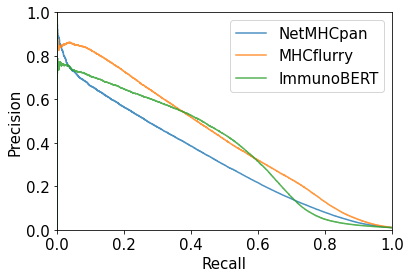

In [29]:
ax = plt.gca()
ax.margins(x=0, y=0)
h_netmhcpan = pr_display_netmhcpan.plot(ax=ax, alpha=0.8)
h_mhcflurry = pr_display_mhcflurry.plot(ax=ax, alpha=0.8)
h_immunobert = pr_display_immunobert.plot(ax=ax, alpha=0.8)
ax.legend(["NetMHCpan", "MHCflurry", "ImmunoBERT"], fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Recall', fontsize=15)
ax.set_ylabel('Precision', fontsize=15)
plt.savefig(f"{pMHC.OUTPUT_FOLDER}{SEP}benchmark{SEP}PR.pdf")

## calc ROC-AUC

In [31]:
ROC_netmhcpan = roc_auc_score(hits, preds_netmhcpan)
ROC_mhcflurry = roc_auc_score(hits, preds_mhcflurry)
ROC_immunobert = roc_auc_score(hits, preds_immunobert)

print(f"ROC-AUC: ")
print(f" NetMHCpan:  {ROC_netmhcpan:.4f}")
print(f" MHCflurry:  {ROC_mhcflurry:.4f}")
print(f" ImmunoBERT: {ROC_immunobert:.4f}")

ROC-AUC: 
 NetMHCpan:  0.9157
 MHCflurry:  0.9377
 ImmunoBERT: 0.8931


# appraisal - reduced dataset

In [33]:
del n_flanks_
del c_flanks_
del hlas_

del n_flanks
del c_flanks
del hlas

In [34]:
del preds_mixmhc

In [35]:
del backup_preds_immunobert

In [32]:
peptides_train = {}

for obs in tqdm(Observation.obs_views[SPLIT_TRAIN][VIEW_SAMA]):
    for ex in [obs.get_example(idx) for idx in range(-1, 99)]:
        peptides_train.update({ex.peptide_seq: None})

100%|██████████| 1407876/1407876 [3:17:33<00:00, 118.77it/s]  


In [36]:
del pMHC.data.Decoy.df

In [38]:
hits_red = []
preds_netmhcpan_red = []
preds_mhcflurry_red = []
preds_immunobert_red = []

for i, peptide in tqdm(enumerate(peptides)):
    if peptide not in peptides_train:
        hits_red.append(hits[i])
        preds_netmhcpan_red.append(preds_netmhcpan[i])
        preds_mhcflurry_red.append(preds_mhcflurry[i])
        preds_immunobert_red.append(preds_immunobert[i])


9158100it [00:08, 1048394.87it/s]


In [39]:
len(hits_red)

2781898

## calculate AP

In [40]:
AP_netmhcpan_red = average_precision_score(hits_red, preds_netmhcpan_red)
AP_mhcflurry_red = average_precision_score(hits_red, preds_mhcflurry_red)
AP_immunobert_red = average_precision_score(hits_red, preds_immunobert_red)

print(f"Reduced AP: ")
print(f" NetMHCpan:  {AP_netmhcpan_red:.4f}")
print(f" MHCflurry:  {AP_mhcflurry_red:.4f}")
print(f" ImmunoBERT: {AP_immunobert_red:.4f}")

Reduced AP: 
 NetMHCpan:  0.1513
 MHCflurry:  0.2145
 ImmunoBERT: 0.1634


## plot PR - curve

In [41]:
precision_netmhcpan_red, recall_netmhcpan_red, threshold_netmhcpan_red = precision_recall_curve(hits_red, preds_netmhcpan_red)
precision_mhcflurry_red, recall_mhcflurry_red, threshold_mhcflurry_red = precision_recall_curve(hits_red, preds_mhcflurry_red)
precision_immunobert_red, recall_immunobert_red, threshold_immunobert_red = precision_recall_curve(hits_red, preds_immunobert_red)

In [42]:
pr_display_netmhcpan_red = PrecisionRecallDisplay(precision=precision_netmhcpan_red, recall=recall_netmhcpan_red)
pr_display_mhcflurry_red = PrecisionRecallDisplay(precision=precision_mhcflurry_red, recall=recall_mhcflurry_red)
pr_display_immunobert_red = PrecisionRecallDisplay(precision=precision_immunobert_red, recall=recall_immunobert_red)

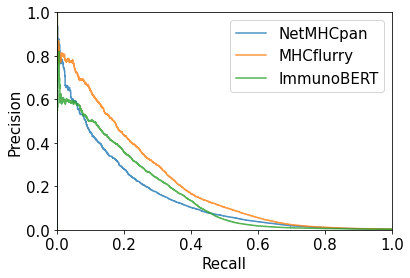

In [43]:
ax = plt.gca()
ax.margins(x=0, y=0)
h_netmhcpan_red = pr_display_netmhcpan_red.plot(ax=ax, alpha=0.8)
h_mhcflurry_red = pr_display_mhcflurry_red.plot(ax=ax, alpha=0.8)
h_immunobert_red = pr_display_immunobert_red.plot(ax=ax, alpha=0.8)
ax.legend(["NetMHCpan", "MHCflurry", "ImmunoBERT"], fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Recall', fontsize=15)
ax.set_ylabel('Precision', fontsize=15)
plt.savefig(f"{pMHC.OUTPUT_FOLDER}{SEP}benchmark{SEP}PR_red.pdf")

## calc ROC-AUC

In [45]:
ROC_netmhcpan_red = roc_auc_score(hits_red, preds_netmhcpan_red)
ROC_mhcflurry_red = roc_auc_score(hits_red, preds_mhcflurry_red)
ROC_immunobert_red = roc_auc_score(hits_red, preds_immunobert_red)

print(f"ROC-AUC: ")
print(f" NetMHCpan:  {ROC_netmhcpan_red:.4f}")
print(f" MHCflurry:  {ROC_mhcflurry_red:.4f}")
print(f" ImmunoBERT: {ROC_immunobert_red:.4f}")

ROC-AUC: 
 NetMHCpan:  0.8733
 MHCflurry:  0.8903
 ImmunoBERT: 0.8309
